<span style="font-size: 14pt">MIPT, Advanced ML, Autumn 2017</span>

<span style="font-size: 16pt"> HW#1 </span>

<span style="color:blue; font-size: 12pt">Alexey Romanenko </span>,
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'">alexromsput@gmail.com</span>

<h1 align="center">Organization Info</h1> 

**Дополнительный материал для выполнения дз**:
- Лукишн Ю.П. Адаптивные методы краткосрочного прогнозирования временных рядов. Финансы и статистика. 2003, главы 1,4,5,7.
- Магнус Я.Р., Катышев П.К., Пересецкий А.А. Эконометрика. Начальный курс., глава 11

**Оформление дз**: 
- Присылайте выполненное задание на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2017_Aut_fall <номер_группы> <фамилия>``, к примеру -- ``ML2017_Aut_fall 401 ivanov``
- Выполненное дз сохраните в файл ``<фамилия>_<группа>_task<номер>.ipnb``, к примеру -- ``ivanov_401_task1.ipnb``

**Вопросы**:
- Присылайте вопросы на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2017_Aut_fall Question <Содержание вопроса>``

--------
- **PS1**: Мы используем автоматические фильтры, и просто не найдем ваше дз, если вы не аккуратно его подпишите.
- **PS2**: Напоминаем, что дедлайны жесткие, письма пришедшие после автоматически удаляются =( чтобы соблазна не было 

<h1 align="center">Check Questions (15%)</h1> 

Ответе на вопросы своими словами (загугленный материал надо пересказать), ответ обоснуйте (напишите и ОБЪЯСНИТЕ формулки если потребуется), если не выходит, то вернитесь к лекции дополнительным материалам:

**Вопрос 1**: Опишите, как изменяется адаптивная способность алгоритма ЭСС при изменении параметра $\alpha$ от 0 до 1.

При $\alpha$ близком к 1 отвечаем значением близким к значению в предыдущий момент времени, а при близком к 0 помним на много шагов назад и отвечаем "средним" значением.

**Вопрос 2**: Каким следует выбрать параметр сглаживания тренда $\alpha_2$ в модели Хольта (линейный тренд) в случае, когда вы предсказываете временной ряд 1) с плавно меняющимя трендом; 2) стохастически меняющися трендом?

Для плавно меняющегося тренда подойдет значение параметра близкое к 0, так как тогда мы смотрим далеко назад и усредняем, что будет близко к правде при плавно меняющемся тренде. Когда тренд меняется случайно, то помнить, что было раньше даже вредно. В данном сучае необходимо быстро подстраиваться под новый тренд, так что лучше брать значение параметра близким к 1.

**Вопрос 3**: Докажите  эквивалетность формул расчёта (в рекуррентной форме и в форме корректировки прогноза (correction error form) )скрытых компонент временного ряда в модели Тейла-Вейджа (период сезонность обозначается $p$):
$$l_t = \alpha (y_t - s_{t-p}) + (1-\alpha) (l_{t-1} + b_{t-1} ) \color{red}{=} l_{t-1} + b_{t-1} + \alpha e_t;$$,
    $$ b_t = \beta (l_{t} - l_{t-1} ) + (1-\beta) b_{t-1} \color{red}{=} b_{t-1} + \alpha\beta e_t;$$,
    $$ s_t = \gamma (y_t-l_t) + (1-\gamma) s_{t-p} \color{red}{=} s_{t-p} + \gamma(1-\alpha)e_t.$$,

<img src="images/3.jpg">

**Вопрос 4**: Выведите формулу расчёта скрытых компонент в форме корректировки прогноза (correction error form) временного ряда в модели ЭС с линейным затухающим трендом (WS with additive damped trend):

$$\hat{y}_{t+d|t} = l_t + \left(\phi + \phi^2 + \dots + \phi^{d}\right) b_t.$$,
   
Скрытые компоненты ВР согласно модели в рекуррентной форме записываются:
    $$ l_{t}       = \alpha y_t + \left(1-\alpha\right) \left(l_{t-1} +\phi b_{t-1}\right),$$,
    $$ b_t         = \beta \left(l_t - l_{t-1}\right) + \left(1-\beta\right)\phi b_{t-1}.$$


<img src="images/4.jpg">

-----------
PS: Если проверяющий не понял ответ на большинство вопросов, то будет пичалька. Пишите так, чтобы можно было разобраться. 

<h1 align="center"> Practice</h1>
#  1. reading data (5%)

  * Download data for following data sets
     - 1) <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv </span>(1 TS of monthly wage in Russia)

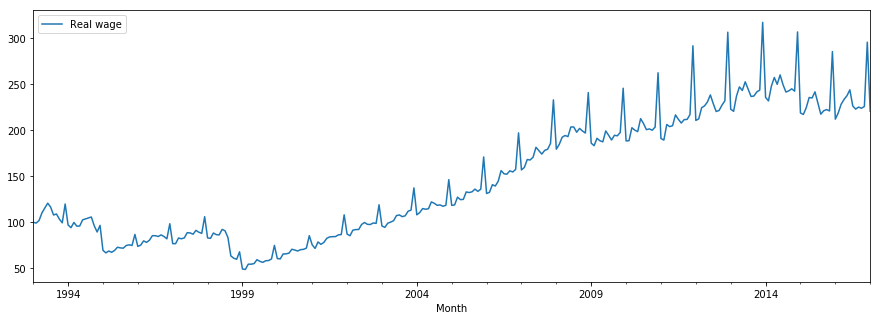

In [1]:
# start with this code
import pandas as pd
import numpy as np
import math
from utils import InitExponentialSmoothing, BuildForecast, plotTSForecast
from utils import qualityRMSE, qualityMedianAE, qualityMACAPE, qualitySSE, qualityMSE, qualityMAPE 

%matplotlib inline


wage = pd.read_csv('./monthly-wage.csv', sep=';', decimal='.', index_col= 0, parse_dates=True, dayfirst=True)

# Put your code below
wage.plot(figsize=(15,5))

# 2. Build the Forecast with  IES (5%)

You need to apply IES model (see seminar 1) for the TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span>.

Forecast delay $h=1$ for all point in this task.


* 0) Forecast Wage TS with SES $\alpha=.1$.
* 1) Find the best param $\alpha$ of SES for data period from 09.1998 to 01.2015. Is the optimal value close to 0 or 1? (You 
can choose any loss function above).
* 2) Draw the forecast that correspond to IES with optimial value $\alpha$ (use time steps from 09.1998 to 01.2017.)
     Conclude whether IES can be used for this TS? If can not than explain why.
* 3) Calculate loss of the forecast of TS in [02.2015, 01.2017]. (You can choose any Loss function from seminar 1).

## 1) Search for the optimal $\alpha$ 

In [2]:
ts = pd.read_csv('./TimeSeries_Data10.csv', sep=',', decimal='.', parse_dates=True, dayfirst=True, index_col='Dates')
ts.index.names=['Timestamp']
ts = ts.sort_index() # sort index
ts.head()

,Item: 165,Item: 969,Item: 2653,Item: 2654,Item: 2692,Item: 2695,Item: 2697,Item: 2765,Item: 2767,Item: 2806,Item: 2808
Timestamp,,,,,,,,,,,
2005-01-11,NaN,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-12,NaN,5.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-13,NaN,2.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-14,NaN,42.0,14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005-01-15,NaN,NaN,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
ALPHA = [0.7, 0.4, 0.2, .15, 0.1, 0.05, 0.01]
ESParamsArray = [{'alpha':alpha, 'AdaptationPeriod':5} for alpha in ALPHA]
FRC_WAGE_IES = BuildForecast(h=1, ts=wage, AlgName = 'InitExponentialSmoothing', AlgTitle='IES',ParamsArray = ESParamsArray)

In [4]:
# compare ES parameters
QualityStr = pd.DataFrame(index = wage.columns, columns = FRC_WAGE_IES.keys())

ix = wage.loc['1998-09-01':'2017-01-01'].index
for param_cntr in sorted(QualityStr.columns):
    frc_wage = FRC_WAGE_IES[param_cntr]
    QualityStr[param_cntr],_ = qualityMACAPE(wage.loc[ix], frc_wage.loc[ix])

QualityStr[QualityStr.columns].mean().sort_values()

IES {'alpha': 0.4, 'AdaptationPeriod': 5}     0.059372
IES {'alpha': 0.7, 'AdaptationPeriod': 5}     0.062208
IES {'alpha': 0.2, 'AdaptationPeriod': 5}     0.066044
IES {'alpha': 0.15, 'AdaptationPeriod': 5}    0.073477
IES {'alpha': 0.1, 'AdaptationPeriod': 5}     0.089195
IES {'alpha': 0.05, 'AdaptationPeriod': 5}    0.133561
IES {'alpha': 0.01, 'AdaptationPeriod': 5}    0.332608
dtype: float64

## 2) draw the forecast with optimial value $\alpha $

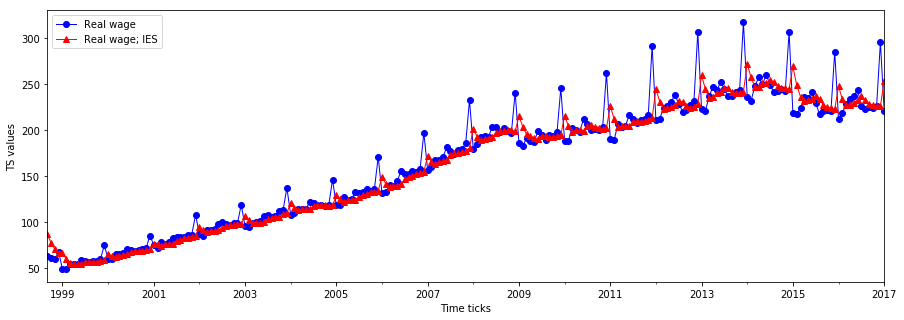

In [5]:
algName_IES = QualityStr[QualityStr.columns].mean().sort_values().index[0]
plotTSForecast(wage.loc['1998-09-01':'2017-01-01'], FRC_WAGE_IES[algName_IES].loc['1998-09-01':'2017-01-01'],
               ts_num=0, alg_title='IES')

** Question**
    * Does SES follow to the TS components?

Модель не достаточно хорошо приближает реальные данные: плохо выражены сезонные пики, все предсказания сдвинуты на шаг вперед(предсказывают с опозданием).

## 3) Calculate loss of the forecast of TS in [02.2015, 01.2017]

In [6]:
qualityMACAPE(wage.loc['2015-02-01':'2017-01-01'], FRC_WAGE_IES[algName_IES].loc['2015-02-01':'2017-01-01'])[0]

Real wage    0.062764
dtype: float64

# 3. Winters model for Additive Seasonality (25%)
You need to realize ES model for TS with additive seasonality and then use it for forecasting real TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span>.

Forecast delay $h=1$ for all point in this task.

* 1) Realize Winters model for Seasonal TS
* 2) Find optimal params $\alpha$ (smoothing of level) and $\gamma$ (smoothing of seasonality) (use data from 09.1998 to 01.2015).(Loss function should be the same as in task 2.)
* 3) Draw the forecast that correspond optimal values $\alpha$ and $\gamma$ (data from 09.1998 to 01.2017). 
* 4) Calculate accuracy of the forecast of TS in [02.2015, 01.2017] (Loss function should be the same as in task 2.). Compare it with accuracy of IES: is it better? 
* 5) Conclude whether Winter's ES can be used for this TS?

## 1) Winters model for Seasonal TS

In [7]:
# Start with this code
###################### Winters Exponential Smoothing #########################
# x <array Tx1>- time series, 
# h <scalar> - forecasting delay
# Params <dict> - dictionary with 
#    alpha <scalar in [0,1]> - smoothing parameter
#    delts <scalar in [0,1]> - seasonality smoothing parameter

def WintersExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    delta = Params['delta']
    p = Params['seasonality_period']
    
    FORECAST = np.zeros(T + h)
    
    l= np.NaN
    s= np.zeros(p)
    
    for cntr in range(T):
        if not math.isnan(x[cntr]):
            if math.isnan(l):
                l= x[0] 
 
            if math.isnan(s[cntr % p]):
                s[cntr % p]= 0 
            
            l_prev = l
            l = alpha*(x[cntr] - s[(cntr+h)%p]) + (1 - alpha)*l_prev
            s[cntr % p] = delta*(x[cntr] - l_prev) + (1 - delta)*s[cntr % p]
            
        FORECAST[cntr+h] = l + s[(cntr+h) % p]
    return FORECAST

In [8]:
def BuildForecast(h, ts, AlgName, AlgTitle, ParamsArray, step='M'):
    FRC_TS = dict()
    for p in ParamsArray:
        frc_horizon = pd.date_range(ts.index[-1], periods=h+1, freq=step)[1:]
        frc_ts = pd.DataFrame(index = ts.index.append(frc_horizon), columns = ts.columns)

        for cntr in ts.columns:
            frc_ts[cntr] = eval(AlgName)(ts[cntr], h, p)

#         frc_ts.columns = frc_ts.columns+('%s %s' % (AlgTitle, p))
        FRC_TS['%s %s' % (AlgTitle, p)] = frc_ts
    return FRC_TS

## 2) Search for the optimal $\alpha$ и $\gamma$ 

In [9]:
ALPHA = [0.7, 0.4, 0.2, .15, 0.1, 0.05, 0.01]
DELTA = [0.7, 0.4, 0.2, .15, 0.1, 0.05, 0.01]
ESParamsArray = [{'alpha':alpha, 'delta':delta, 'seasonality_period':12} 
                 for alpha in ALPHA
                 for delta in DELTA]

FRC_WAGE_WES = BuildForecast(h=1, ts=wage, AlgName = 'WintersExponentialSmoothing', 
                             AlgTitle='WES', ParamsArray = ESParamsArray)

In [10]:
# compare ES parameters
QualityStr = pd.DataFrame(index = wage.columns, columns = FRC_WAGE_WES.keys())

ix = wage.loc['1998-09-01':'2017-01-01'].index
for param_cntr in sorted(QualityStr.columns):
    frc_wage = FRC_WAGE_WES[param_cntr]
    QualityStr[param_cntr],_ = qualityMACAPE(wage.loc[ix], frc_wage.loc[ix])

QualityStr[QualityStr.columns].mean().sort_values()

WES {'alpha': 0.7, 'delta': 0.7, 'seasonality_period': 12}      0.026920
WES {'alpha': 0.4, 'delta': 0.7, 'seasonality_period': 12}      0.027195
WES {'alpha': 0.4, 'delta': 0.4, 'seasonality_period': 12}      0.029439
WES {'alpha': 0.7, 'delta': 0.4, 'seasonality_period': 12}      0.031881
WES {'alpha': 0.4, 'delta': 0.2, 'seasonality_period': 12}      0.034024
WES {'alpha': 0.4, 'delta': 0.15, 'seasonality_period': 12}     0.036893
WES {'alpha': 0.7, 'delta': 0.2, 'seasonality_period': 12}      0.040615
WES {'alpha': 0.4, 'delta': 0.1, 'seasonality_period': 12}      0.041564
WES {'alpha': 0.2, 'delta': 0.7, 'seasonality_period': 12}      0.043804
WES {'alpha': 0.7, 'delta': 0.15, 'seasonality_period': 12}     0.044310
WES {'alpha': 0.2, 'delta': 0.4, 'seasonality_period': 12}      0.045179
WES {'alpha': 0.2, 'delta': 0.2, 'seasonality_period': 12}      0.047584
WES {'alpha': 0.4, 'delta': 0.05, 'seasonality_period': 12}     0.048583
WES {'alpha': 0.2, 'delta': 0.15, 'seasonality_peri

## 3) draw the forecast with optimial value $\alpha$ и $\gamma$ 

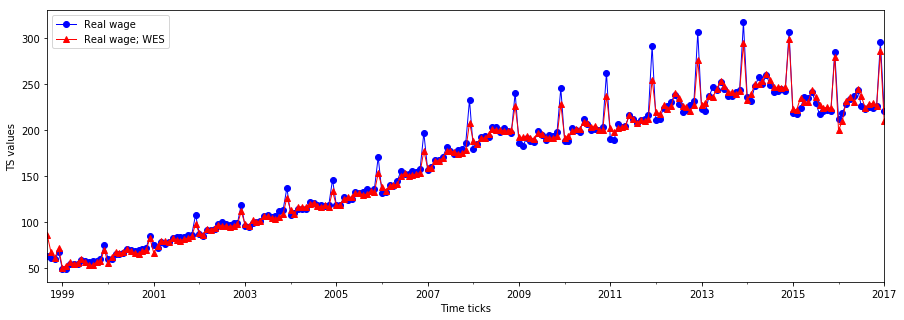

In [11]:
algName_WES = QualityStr[QualityStr.columns].mean().sort_values().index[0]
plotTSForecast(wage.loc['1998-09-01':'2017-01-01'], FRC_WAGE_WES[algName_WES].loc['1998-09-01':'2017-01-01'],
               ts_num=0, alg_title='WES')

## 4) Calculate loss of the forecast of TS in [02.2015, 01.2017]

In [12]:
qualityMACAPE(wage.loc['2015-02-01':'2017-01-01'], FRC_WAGE_WES[algName_WES].loc['2015-02-01':'2017-01-01'])[0]

Real wage    0.023944
dtype: float64

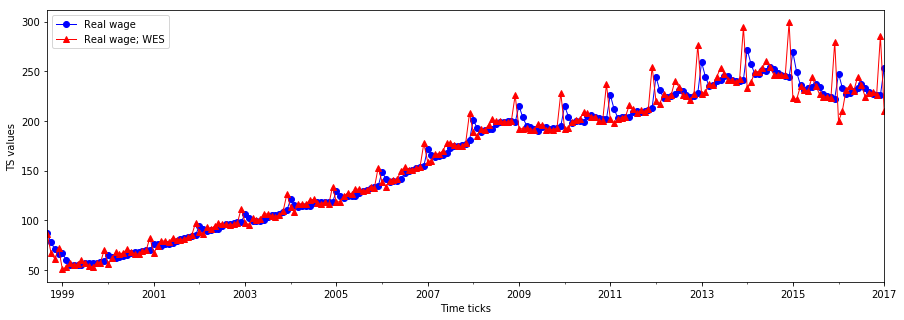

In [13]:
algName_WES = QualityStr[QualityStr.columns].mean().sort_values().index[0]
plotTSForecast(FRC_WAGE_IES[algName_IES].loc['1998-09-01':'2017-01-01'],
               FRC_WAGE_WES[algName_WES].loc['1998-09-01':'2017-01-01'],
               ts_num=0, alg_title='WES')

Ошибка у WES равна 0.023944 против 0.062764 у IES, т.е. в ~3 раза лучше приближает.

## 5) Conclude whether Winter's ES can be used for this TS?

Модель достаточно хорошо приближает реальные данные: отслкживает сезонные пики, нет запоздания. Так что можно использовать(отслеживает и тренд, и сезонность, т.е. все что заложенно в эти данные).

# 4. Theil-Wage model for TS with linear trend and seasonality (25%)
You need to realize Theil-Wage model and then use it for forecasting real TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span>.

Forecast delay $h=1$ for all point in this task.

* 1) Realize Theil-Wage model for
* 2) Find optimal params $\alpha$ (smoothing of level), $\beta$ (smoothing trend) and $\gamma$ (smoothing of seasonality) (use data from 09.1998 to 01.2015).(Loss function should be the same as in task 2.)
* 3) Draw forecast with optimal values $\alpha$, $\beta$ and $\gamma$ from 09.1998 to 01.2017. 
* 4) Calculate accuracy of the forecast of TS in [02.2015, 01.2017] (Loss function should be the same as in task 2.). Compare it with accuracy of Winters model: is it better than the last one? 
* \*5) Suggest how can the Theil-Wage model be improved to make accuracy of forecast better?

## 1) Theil-Wage model for Seasonal TS

In [14]:
###################### Theil-Wage Exponential Smoothing #########################
# x <array Tx1>- time series, 
# h <scalar> - forecasting delay
# Params <dict> - dictionary with 
#    alpha <scalar in [0,1]> - smoothing of level parameter
#    beta <scalar in [0,1]> - smoothing trend parameter
#    gamma <scalar in [0,1]> - seasonality smoothing parameter

def TheilWageExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    beta = Params['beta']
    gamma = Params['gamma']
    p = Params['seasonality_period']
    
    FORECAST = np.zeros(T + h)
    
    l = np.NaN
    b = np.NaN
    s = np.zeros(p)
    
    for cntr in range(T):
        if not math.isnan(x[cntr]):
            if math.isnan(l):
                l = x[0] 
                
            if math.isnan(b):
                b = 0
 
            if math.isnan(s[cntr % p]):
                s[cntr % p]= 0 
            
            l_prev = l
            b_prev = b
            
            l = alpha*(x[cntr] - s[(cntr+h)%p]) + (1 - alpha)*(l_prev + b_prev)
            b = beta*(l - l_prev) + (1 - beta)*b_prev
            s[cntr % p] = gamma*(x[cntr] - l) + (1 - gamma)*s[cntr % p]
            
        FORECAST[cntr+h] = (l + b*h) + s[(cntr+h) % p]
    return FORECAST

## 2) Search for the optimal $\alpha$ и $\gamma$ 

In [15]:
ALPHA = [0.7, 0.4, 0.2, .15, 0.1, 0.05, 0.01]
BETA = [0.7, 0.4, 0.2, .15, 0.1, 0.05, 0.01]
GAMMA = [0.7, 0.4, 0.2, .15, 0.1, 0.05, 0.01]
ESParamsArray = [{'alpha':alpha, 'beta':beta, 'gamma':gamma, 'seasonality_period':12} 
                 for alpha in ALPHA
                 for beta in BETA
                 for gamma in GAMMA]

FRC_WAGE_TWES = BuildForecast(h=1, ts=wage, AlgName = 'TheilWageExponentialSmoothing', 
                              AlgTitle='TWES', ParamsArray = ESParamsArray)

In [16]:
# compare ES parameters
QualityStr = pd.DataFrame(index = wage.columns, columns = FRC_WAGE_TWES.keys())

ix = wage.loc['1998-09-01':'2017-01-01'].index
for param_cntr in sorted(QualityStr.columns):
    frc_wage = FRC_WAGE_TWES[param_cntr]
    QualityStr[param_cntr],_ = qualityMACAPE(wage.loc[ix], frc_wage.loc[ix])

QualityStr[QualityStr.columns].mean().sort_values()

TWES {'alpha': 0.2, 'beta': 0.15, 'gamma': 0.7, 'seasonality_period': 12}      0.040260
TWES {'alpha': 0.2, 'beta': 0.1, 'gamma': 0.7, 'seasonality_period': 12}       0.040304
TWES {'alpha': 0.2, 'beta': 0.2, 'gamma': 0.7, 'seasonality_period': 12}       0.040991
TWES {'alpha': 0.2, 'beta': 0.15, 'gamma': 0.4, 'seasonality_period': 12}      0.041153
TWES {'alpha': 0.2, 'beta': 0.05, 'gamma': 0.7, 'seasonality_period': 12}      0.041341
TWES {'alpha': 0.2, 'beta': 0.2, 'gamma': 0.4, 'seasonality_period': 12}       0.041637
TWES {'alpha': 0.2, 'beta': 0.1, 'gamma': 0.4, 'seasonality_period': 12}       0.041852
TWES {'alpha': 0.2, 'beta': 0.4, 'gamma': 0.4, 'seasonality_period': 12}       0.042744
TWES {'alpha': 0.4, 'beta': 0.01, 'gamma': 0.7, 'seasonality_period': 12}      0.043080
TWES {'alpha': 0.2, 'beta': 0.05, 'gamma': 0.4, 'seasonality_period': 12}      0.043109
TWES {'alpha': 0.4, 'beta': 0.05, 'gamma': 0.7, 'seasonality_period': 12}      0.043985
TWES {'alpha': 0.15, 'beta': 0.1

## 3) draw the forecast with optimial value $\alpha$ и $\gamma$ 

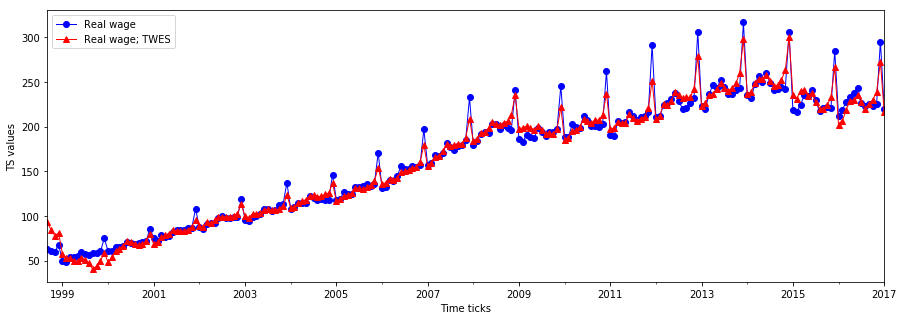

In [17]:
algName_TWES = QualityStr[QualityStr.columns].mean().sort_values().index[0]
plotTSForecast(wage.loc['1998-09-01':'2017-01-01'], FRC_WAGE_TWES[algName_TWES].loc['1998-09-01':'2017-01-01'],
               ts_num=0, alg_title='TWES')

## 4) Calculate loss of the forecast of TS in [02.2015, 01.2017]

In [18]:
qualityMACAPE(wage.loc['2015-02-01':'2017-01-01'], FRC_WAGE_TWES[algName_TWES].loc['2015-02-01':'2017-01-01'])[0]

Real wage    0.031512
dtype: float64

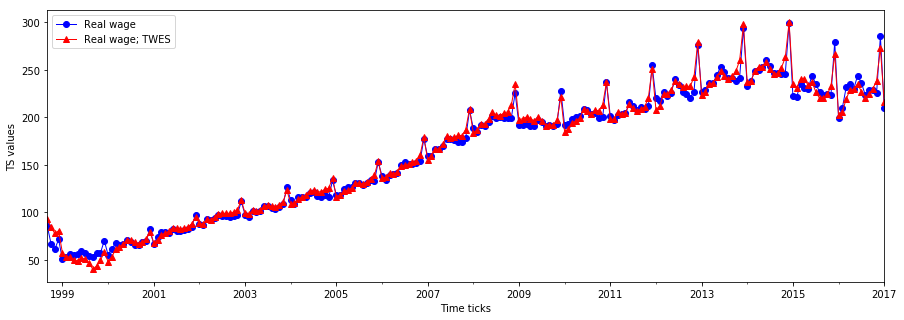

In [19]:
algName_TWES = QualityStr[QualityStr.columns].mean().sort_values().index[0]
plotTSForecast(FRC_WAGE_WES[algName_WES].loc['1998-09-01':'2017-01-01'],  
               FRC_WAGE_TWES[algName_TWES].loc['1998-09-01':'2017-01-01'],
               ts_num=0, alg_title='TWES')

Ошибка у WES равна 0.023944 против 0.031512 у TWES, т.е. в ~1.5 раза хуже приближает. Но как мне кажется, данная проблема возникает во многом из-за начального приближения.

## 5) Suggest how can the Theil-Wage model be improved to make accuracy of forecast better?

# 5. Non-additive model of ES (25%)
You need to realize some ES-model that include non-addive component (or multiplicative trend or multiplicative component) and then use it for forecasting real TS <span style="color:blue; font-family:'New Times Roman'; font-size:14pt">monthly-wage.csv</span>.

Forecast delay $h=1$ for all point in this task.

* 1) Realize one of following ES models: ESM(A,M) (t.e. Holt-Winters model), ESM(Ad,M), ESM(M,A), ESM(M,M) model.
* 2) Find optimal params of the model (use data from 09.1998 to 01.2015). Note: if you choose damped trend model that $\phi$ you can just set it by expert opinion (say $0.98$). (Loss function should be the same as in task 2.)
* 3) Draw forecast with optimal values of it's params (data from 09.1998 to 01.2017). 
* 4) Calculate accuracy of the forecast of TS in [02.2015, 01.2017] (Loss function should be the same as in task 2.). Compare it with accuracy of Winters model and Theil-Wage model: is it better than the last one? 
* 5) Is it true that multiplicative model are more unstable than additive? Unstable means thet forecast is can diveret

## 1) Holt-Winters model for Seasonal TS

In [20]:
###################### Theil-Wage Exponential Smoothing #########################
# x <array Tx1>- time series, 
# h <scalar> - forecasting delay
# Params <dict> - dictionary with 
#    alpha <scalar in [0,1]> - smoothing of level parameter
#    beta <scalar in [0,1]> - smoothing trend parameter
#    gamma <scalar in [0,1]> - seasonality smoothing parameter

def HoltWintersExponentialSmoothing(x, h, Params):
    T = len(x)
    alpha = Params['alpha']
    beta = Params['beta']
    gamma = Params['gamma']
    p = Params['seasonality_period']
    
    FORECAST = np.zeros(T + h)
    
    l = np.NaN
    b = np.NaN
    s = np.ones(p)
    
    for cntr in range(T):
        if not math.isnan(x[cntr]):
            if math.isnan(l):
                l = x[0] 
                
            if math.isnan(b):
                b = 0
 
            if math.isnan(s[cntr % p]):
                s[cntr % p]= 0 
            
            l_prev = l
            b_prev = b
            
            l = alpha*(x[cntr] / s[(cntr+h)%p]) + (1 - alpha)*(l_prev + b_prev)
            b = beta*(l - l_prev) + (1 - beta)*b_prev
            s[cntr % p] = gamma*(x[cntr] / l) + (1 - gamma)*s[cntr % p]
            
        FORECAST[cntr+h] = (l + b*h) * s[(cntr+h) % p]
    return FORECAST

## 2) Search for the optimal $\alpha$ и $\gamma$ 

In [21]:
ALPHA = [0.7, 0.4, 0.2, .15, 0.1, 0.05, 0.01]
BETA = [0.7, 0.4, 0.2, .15, 0.1, 0.05, 0.01]
GAMMA = [0.7, 0.4, 0.2, .15, 0.1, 0.05, 0.01]
ESParamsArray = [{'alpha':alpha, 'beta':beta, 'gamma':gamma, 'seasonality_period':12} 
                 for alpha in ALPHA
                 for beta in BETA
                 for gamma in GAMMA]

FRC_WAGE_HWES = BuildForecast(h=1, ts=wage, AlgName = 'HoltWintersExponentialSmoothing', 
                              AlgTitle='HWES', ParamsArray = ESParamsArray)

In [22]:
# compare ES parameters
QualityStr = pd.DataFrame(index = wage.columns, columns = FRC_WAGE_HWES.keys())

ix = wage.loc['1998-09-01':'2017-01-01'].index
for param_cntr in sorted(QualityStr.columns):
    frc_wage = FRC_WAGE_HWES[param_cntr]
    QualityStr[param_cntr],_ = qualityMACAPE(wage.loc[ix], frc_wage.loc[ix])

QualityStr[QualityStr.columns].mean().sort_values()

HWES {'alpha': 0.2, 'beta': 0.1, 'gamma': 0.7, 'seasonality_period': 12}       0.040413
HWES {'alpha': 0.2, 'beta': 0.05, 'gamma': 0.7, 'seasonality_period': 12}      0.040897
HWES {'alpha': 0.2, 'beta': 0.15, 'gamma': 0.7, 'seasonality_period': 12}      0.040918
HWES {'alpha': 0.2, 'beta': 0.15, 'gamma': 0.4, 'seasonality_period': 12}      0.042035
HWES {'alpha': 0.2, 'beta': 0.2, 'gamma': 0.7, 'seasonality_period': 12}       0.042087
HWES {'alpha': 0.2, 'beta': 0.1, 'gamma': 0.4, 'seasonality_period': 12}       0.042334
HWES {'alpha': 0.2, 'beta': 0.05, 'gamma': 0.4, 'seasonality_period': 12}      0.042719
HWES {'alpha': 0.15, 'beta': 0.15, 'gamma': 0.7, 'seasonality_period': 12}     0.042865
HWES {'alpha': 0.2, 'beta': 0.2, 'gamma': 0.4, 'seasonality_period': 12}       0.042948
HWES {'alpha': 0.15, 'beta': 0.1, 'gamma': 0.7, 'seasonality_period': 12}      0.043555
HWES {'alpha': 0.15, 'beta': 0.2, 'gamma': 0.7, 'seasonality_period': 12}      0.043991
HWES {'alpha': 0.15, 'beta': 0.2

## 3) draw the forecast with optimial value $\alpha$ и $\gamma$ 

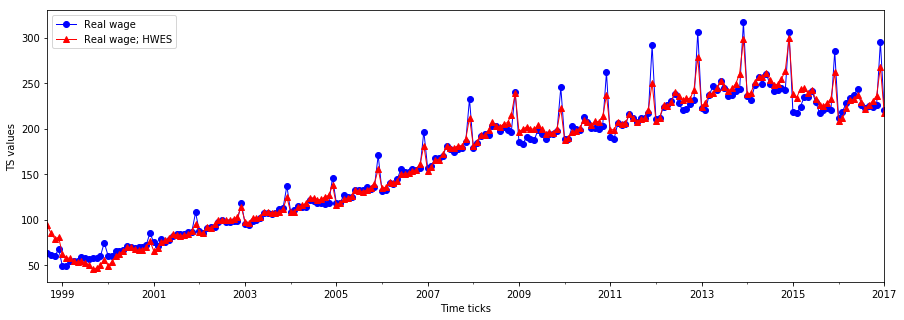

In [23]:
algName_HWES = QualityStr[QualityStr.columns].mean().sort_values().index[0]
plotTSForecast(wage.loc['1998-09-01':'2017-01-01'], FRC_WAGE_HWES[algName_HWES].loc['1998-09-01':'2017-01-01'],
               ts_num=0, alg_title='HWES')

## 4) Calculate loss of the forecast of TS in [02.2015, 01.2017]

In [24]:
qualityMACAPE(wage.loc['2015-02-01':'2017-01-01'], FRC_WAGE_HWES[algName_HWES].loc['2015-02-01':'2017-01-01'])[0]

Real wage    0.032992
dtype: float64

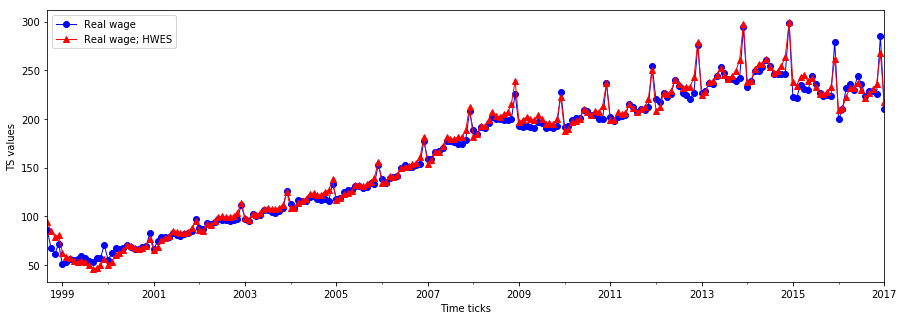

In [25]:
algName_HWES = QualityStr[QualityStr.columns].mean().sort_values().index[0]
plotTSForecast(FRC_WAGE_WES[algName_WES].loc['1998-09-01':'2017-01-01'],  
               FRC_WAGE_HWES[algName_HWES].loc['1998-09-01':'2017-01-01'],
               ts_num=0, alg_title='HWES')

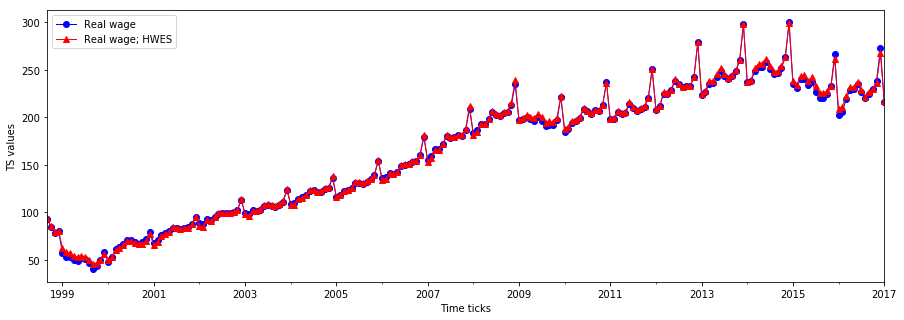

In [26]:
algName_HWES = QualityStr[QualityStr.columns].mean().sort_values().index[0]
plotTSForecast(FRC_WAGE_TWES[algName_TWES].loc['1998-09-01':'2017-01-01'],  
               FRC_WAGE_HWES[algName_HWES].loc['1998-09-01':'2017-01-01'],
               ts_num=0, alg_title='HWES')

Ошибка у WES равна 0.023944 против 0.031512 у TWES и 0.032992 HWES, т.е. в ~1.5 раза лучше конкурентов.

## 5) Is it true that multiplicative model are more unstable than additive? Unstable means thet forecast is can diveret

Не заметил существнного отличия мультипликативной модели от аддитивной(на графике выше TWES вместе с HWES и они практически одинаковы), так что ничего про нестабильность сказать не могу.